In [1]:
import pandas as pd
import scipy as sc
import sklearn as sl
import pickle as pk
import csv
import numpy
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [4]:
df['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
9.20      8
8.00      8
7.00      7
21.00     5
7.50      5
9.60      5
23.00     5
8.40      5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compressionratio, dtype: int64

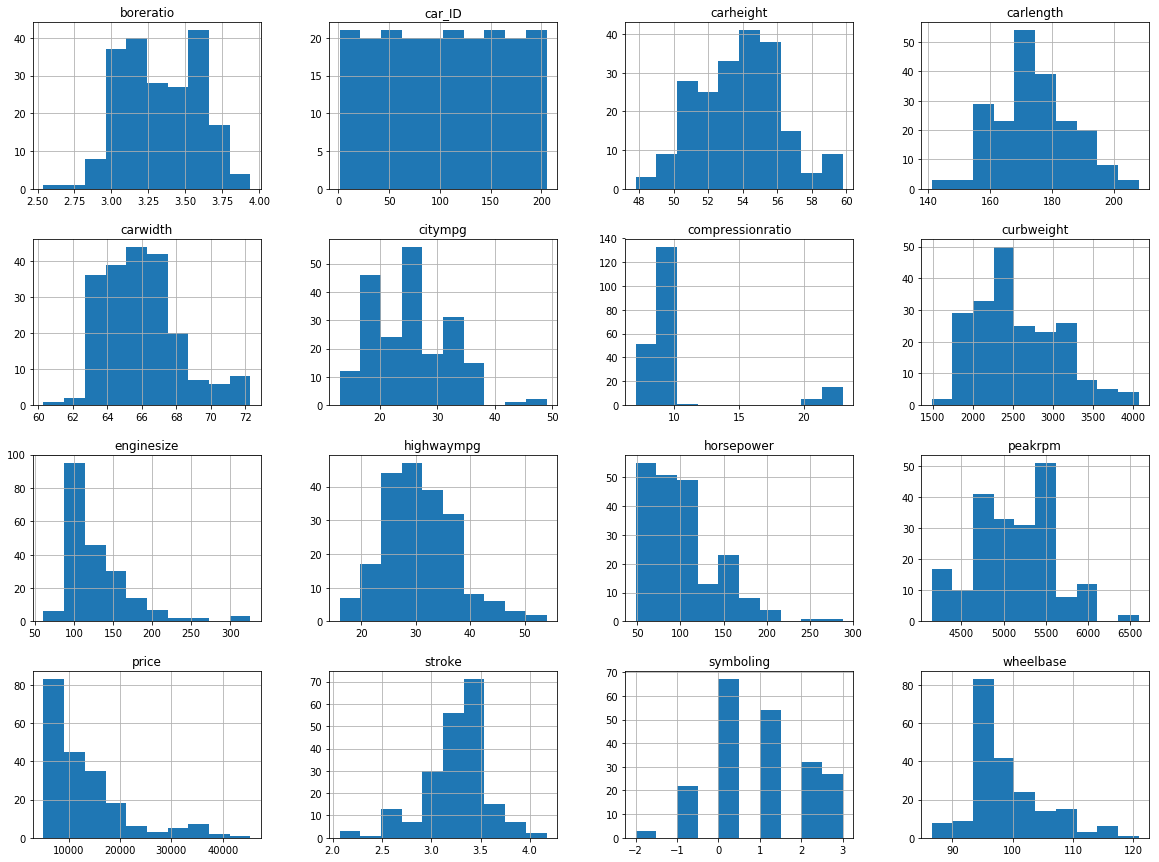

In [5]:
%matplotlib inline
df.hist(bins=10,figsize=(20,15))
plt.show()

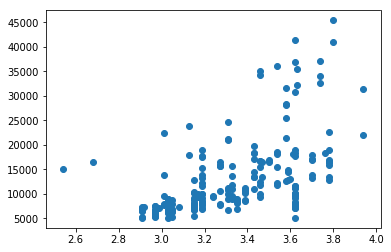

In [6]:
plt.scatter(df['boreratio'],df['price'])

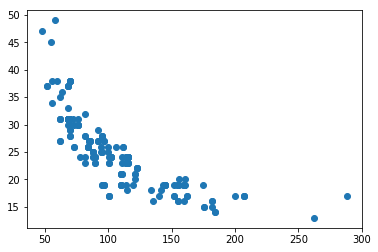

In [7]:
plt.scatter(df['horsepower'],df['citympg'])

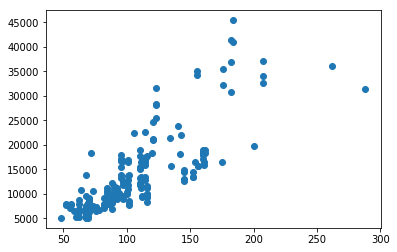

In [8]:
plt.scatter(df['horsepower'],df['price'])

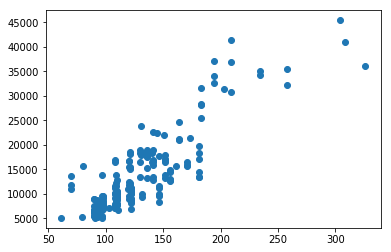

In [9]:
plt.scatter(df['enginesize'],df['price'])

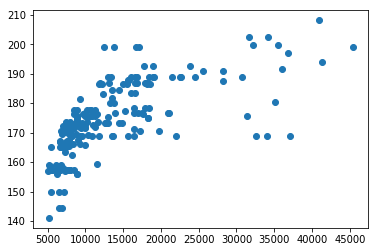

In [10]:
plt.scatter(df['price'],df['carlength'])

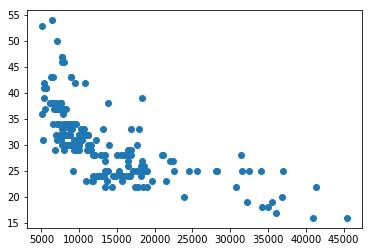

In [11]:
plt.scatter(df['price'],df['highwaympg'])

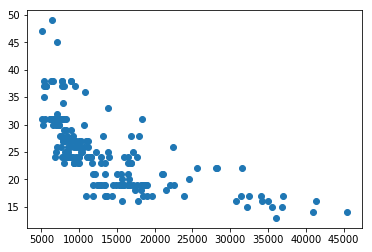

In [12]:
plt.scatter(df['price'],df['citympg'])

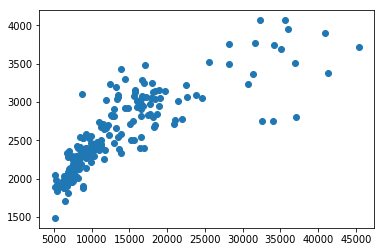

In [13]:
plt.scatter(df['price'],df['curbweight'])

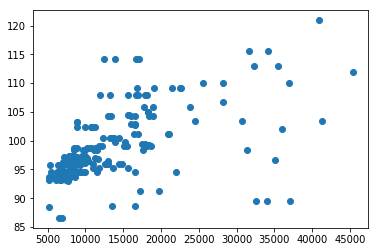

In [14]:
plt.scatter(df['price'],df['wheelbase'])

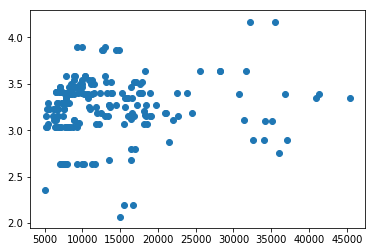

In [15]:
plt.scatter(df['price'],df['stroke'])

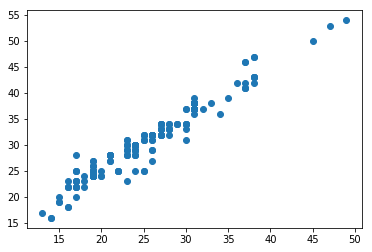

In [16]:
plt.scatter(df['citympg'],df['highwaympg'])

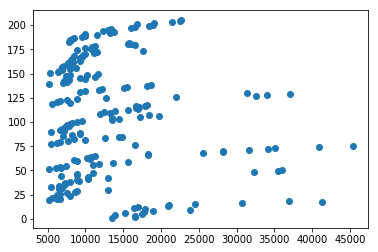

In [17]:
plt.scatter(df['price'],df['car_ID'])

In [18]:
corr_mat=df.corr()
corr_mat

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [19]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [20]:
grouped = df.groupby('car_ID')
statBefore = pd.DataFrame({'mean': grouped['price'].mean(), 'median': grouped['price'].median(), 'std' : grouped['price'].std()})


In [21]:
outlier=df[(numpy.abs(df['price']-df['price'].mean())>(3*df['price'].std()))]
outlier

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [22]:
inliers=df[(numpy.abs(df['price']-df['price'].mean())<(3*df['price'].std()))]
inliers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [23]:
car_cat=inliers[['CarName','fueltype','aspiration','doornumber','carbody','enginelocation','drivewheel']]
category = pd.get_dummies(car_cat)
category.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [24]:
feature = inliers[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']].join(category)
feature.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0,0,...,0,0,0,1,0,1,0,1,0,0


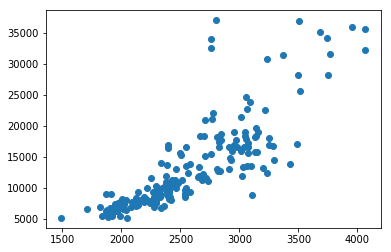

In [25]:
plt.scatter(inliers['curbweight'],inliers['price'])

In [26]:
#feature = inliers[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']]
#feature

In [27]:
 shuffled_indices = numpy.random.permutation(len(feature))

In [88]:
ds=int(len(df)*0.2)

In [89]:
test_indices = shuffled_indices[:ds]
test = feature.iloc[test_indices]
test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
50,93.1,159.1,64.2,1890,91,3.03,68,5195.0,0,0,...,0,0,1,0,0,1,0,0,1,0
165,94.5,168.7,64.0,2265,98,3.24,112,9298.0,0,0,...,0,0,0,1,0,1,0,0,0,1
187,97.3,171.7,65.5,2319,97,3.01,68,9495.0,0,0,...,0,0,0,1,0,1,0,0,1,0
141,97.2,172.0,65.4,2145,108,3.62,82,7126.0,0,0,...,0,0,0,1,0,1,0,0,1,0
90,94.5,165.3,63.8,2017,103,2.99,55,7099.0,0,0,...,0,0,0,1,0,1,0,0,1,0
22,93.7,157.3,63.8,1876,90,2.97,68,6377.0,0,0,...,0,0,1,0,0,1,0,0,1,0
195,104.3,188.8,67.2,3034,141,3.78,114,13415.0,0,0,...,0,0,0,0,1,1,0,0,0,1
101,100.4,181.7,66.5,3095,181,3.43,152,13499.0,0,0,...,0,0,0,1,0,1,0,0,1,0
108,107.9,186.7,68.4,3197,152,3.70,95,13200.0,0,0,...,0,0,0,1,0,1,0,0,0,1
109,114.2,198.9,68.4,3230,120,3.46,97,12440.0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [90]:
train_indices = shuffled_indices[ds:]
train_indices

array([139,   1, 113,  41,  60,  84,  94, 177,  32,  17, 173, 155, 150,
       176, 140, 129,  61,   9, 153,  23,  22,  57, 159, 181,  81, 120,
        63,  74,  69, 180,  65,  92,  71, 189,   8, 143, 182, 112,  34,
        89,  79, 170,  38,  55, 163,  16, 100,  11, 161, 191,  12, 122,
       104,  45, 158,  97, 167, 130, 131,  26,  77,  95, 136,  70, 168,
        27, 147, 148, 134,  18,  42,  53, 114,  54, 117, 127,  46,  14,
        25, 132,  58, 171, 135, 197,  99,   5, 124, 108,  85,  82, 174,
        91,   3, 172, 154,  33,  93, 200,   2,  35, 145,  13, 193,  83,
       196, 151, 110, 133,  88,  39,  72, 157,  31,  76, 111, 149,  78,
       109,  48,  19, 119, 107,  80, 125,  40, 199, 165, 183, 190, 144,
       103,   4, 115, 175,   7, 179, 142,  59,   0,  50,  24,   6,  66,
        20, 101, 121,  86,  15, 166, 164, 128, 126,  28, 160, 137, 169,
        44, 195,  68, 178,  75])

In [91]:
train = feature.iloc[train_indices]
train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
142,97.2,172.0,65.4,2190,108,3.62,82,7775.000,0,0,...,0,0,0,1,0,1,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.000,0,0,...,1,0,0,0,0,1,0,0,0,1
116,107.9,186.7,68.4,3252,152,3.70,95,17950.000,0,0,...,0,0,0,1,0,1,0,0,0,1
42,96.5,169.1,66.0,2293,110,3.15,100,10345.000,0,0,...,0,0,0,1,0,1,0,0,1,0
61,98.8,177.8,66.5,2385,122,3.39,84,10595.000,0,0,...,0,0,1,0,0,1,0,0,1,0
87,96.3,172.4,65.4,2403,110,3.17,116,9279.000,0,0,...,0,0,0,1,0,1,0,0,1,0
97,94.5,170.2,63.8,2037,97,3.15,69,7999.000,0,0,...,0,0,0,0,1,1,0,0,1,0
180,104.5,187.8,66.5,3131,171,3.27,156,15690.000,0,0,...,0,0,0,1,0,1,0,0,0,1
33,93.7,150.0,64.0,1940,92,2.91,76,6529.000,0,0,...,0,0,1,0,0,1,0,0,1,0
18,88.4,141.1,60.3,1488,61,2.91,48,5151.000,0,0,...,0,0,1,0,0,1,0,0,1,0


In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['price'],axis=1),train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
lin_reg.coef_

array([ -5.73251828e+01,  -9.63448927e+01,   1.08858252e+03,
         1.20308353e+01,  -4.30882655e+01,  -2.69030926e+03,
         1.20789150e+01,   2.28718575e+02,  -3.16499617e+02,
        -2.26947853e+03,   7.35521472e+02,   2.09940450e+03,
        -1.58559137e+03,  -1.40486303e+03,  -1.13212075e+03,
        -5.66120505e+03,   2.57598747e+03,   7.60322690e+03,
         9.71520955e+03,   1.13513292e+04,   1.41100716e+04,
         7.98431376e+03,   2.79657592e+03,   8.90850060e-10,
         1.31863727e+03,   9.14996261e+03,   4.22301502e+03,
         4.13490563e+03,   3.98464908e+03,  -2.53269507e+01,
        -1.77447257e+02,   8.77662387e-10,  -6.51268793e+02,
        -1.56826879e+03,  -2.82073718e+03,  -3.33015850e+03,
        -2.56984324e+03,  -5.08948332e+02,  -1.67263910e+03,
        -1.03834315e+03,   1.87503216e+03,  -1.94422417e+03,
        -8.59291825e+02,  -9.58062503e+02,  -1.51415838e+03,
        -5.13637133e-10,   4.21338510e+02,  -1.53671753e+03,
        -1.69604385e+03,

In [95]:
lin_reg.intercept_

-44826.208947438514

In [96]:
prediction = lin_reg.predict(test.drop(['price'],axis=1))

In [97]:
from sklearn.metrics import mean_squared_error


In [98]:
mean_square = mean_squared_error(test['price'],prediction)
root_mean_square = numpy.sqrt(mean_square)
root_mean_square

3567.0306941118388

In [99]:
from sklearn.linear_model import Lasso

In [100]:
regressor= Lasso(random_state=0,alpha=16)
regressor.fit(train.drop(['price'],axis=1),train['price'])

Lasso(alpha=16, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
pred_lasso=regressor.predict(test.drop(['price'],axis=1))

In [102]:
mean_square = mean_squared_error(test['price'],pred_lasso)
rmse = numpy.sqrt(mean_square)
rmse

2297.4706416786912

Lasso Coefficients

In [103]:
regressor.coef_

array([  1.17723794e+02,  -1.14298446e+02,   9.86523638e+02,
         6.12069138e+00,   2.16171454e+01,  -2.36384530e+03,
         3.38048135e+01,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   3.23778368e+03,
         3.06480485e+03,   6.20468099e+03,   6.37612291e+03,
         3.55431703e+03,   2.00273181e+03,   0.00000000e+00,
         0.00000000e+00,   2.06734389e+03,   1.99041039e+03,
         1.18513933e+03,   2.77207852e+03,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.25189909e+02,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,

In [104]:
from sklearn.linear_model import Ridge

In [105]:
regressor_ridge=Ridge(alpha=0.1)
regressor_ridge.fit(train.drop(['price'],axis=1),train['price'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
pred_ridge=regressor_ridge.predict(test.drop(['price'],axis=1))
mean_square = mean_squared_error(test['price'],pred_ridge)
rmse_ridge = numpy.sqrt(mean_square)
rmse_ridge


2587.5766691543499

In [107]:
regressor_ridge.coef_

array([  9.86143428e+01,  -1.21738985e+02,   8.53564556e+02,
         8.09928621e+00,   9.75126914e+00,  -2.59266141e+03,
         2.02071244e+01,  -2.12921095e+02,  -1.04163825e+03,
        -1.68840242e+03,   1.04341576e+03,   2.07872279e+03,
        -3.97786723e+02,   1.30523588e+03,   6.04201333e+02,
        -1.92982594e+03,   2.00967561e+03,   5.24925749e+03,
         5.68281460e+03,   7.77506915e+03,   9.09241863e+03,
         5.53795652e+03,   3.21443702e+03,   0.00000000e+00,
         5.12284145e+02,   5.04301442e+03,   3.83937259e+03,
         3.37633375e+03,   3.86521105e+03,   2.15100080e+02,
        -5.72603833e+02,   0.00000000e+00,  -5.75802256e+02,
        -1.40943858e+03,  -1.82291964e+03,  -2.00237263e+03,
        -1.18720126e+03,  -1.02136791e+03,  -9.50148191e+02,
        -4.90109781e+02,   1.72318702e+03,  -1.36054709e+03,
        -1.05310182e+03,  -7.51209126e+01,  -9.32704331e+02,
         0.00000000e+00,  -2.45665379e+01,  -9.32900355e+02,
        -1.18942467e+03,